In [25]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
cancer.data.shape

(569, 30)

In [30]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#---copy from dataset into a 2-d list---
X = []
# so this will run twice, once for each target
# ex. it will run once for target=0 (malignant) and once for target=1 (benign)
for target in range(2):
    # add a new 2-d list
    X.append([[], []])
    # for each data point in the dataset
    for i in range(len(cancer.data)):              # target is 0 or 1
        # if the target of this data point matches the current target
        if cancer.target[i] == target:
            # add the first feature (mean radius) and second feature (mean texture)
            X[target][0].append(cancer.data[i][0]) # first feature - mean radius
            X[target][1].append(cancer.data[i][1]) # second feature — mean texture

# This list shows all the data points for feature 1 (mean radius) for target 0 (malignant)
# X[0][0]

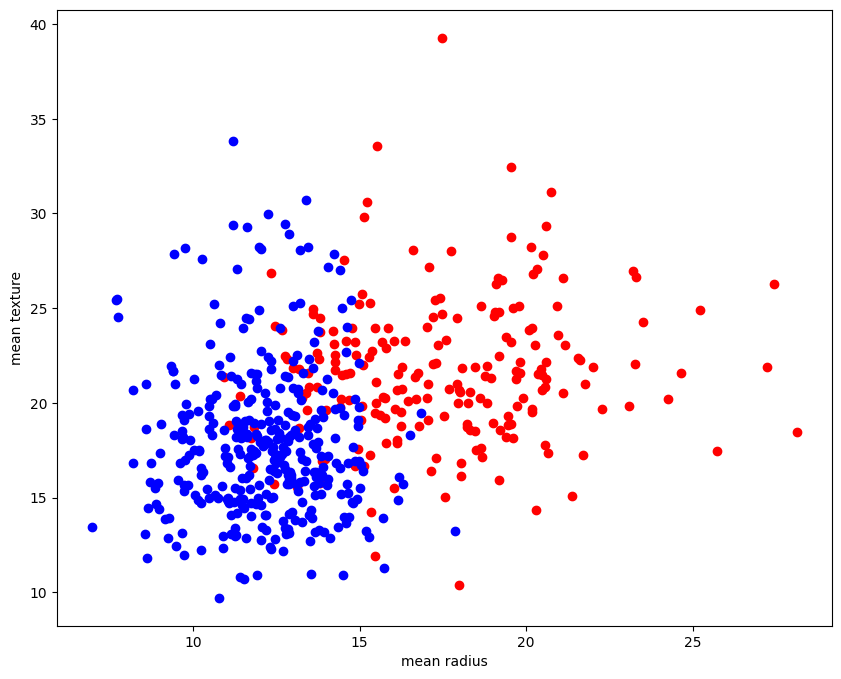

In [23]:

colours = ("r", "b")   # r: malignant, b: benign
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
for target in range(2):
    ax.scatter(X[target][0],
               X[target][1],
               c=colours[target])

ax.set_xlabel("mean radius")
ax.set_ylabel("mean texture")
plt.show()

X= []` - This line initializes an empty list.

The `for` loop after is making nested lists using the features from the cancer dataset, by classification. 'X' is a list of lists, where the first list corresponds to the data for malignant tumors, and the second list is for benign tumors.

Each list contains two lists: one for the mean radius, and another for the mean texture of the tumors.`colours=("r","b")` - Defines a tuple with two colours, red for malignant tumors and blue for benign tumors.

`fig = plt.figure(figsize=(10,8))` - Initializes a new figure for plotting and sets the size of the figure to 10x8 inches.

`ax = fig.add_subplot(111)` - This line of code is adding a subplot to the current figure. The three integers (1, 1, 1) describe the position of the subplot - first is the number of rows, the second is the number of columns, and the third is the index of the current subplot.The next `for` loop is used to plot the mean radius versus the mean texture for malignant and benign tumors in different colors (red and blue respectively).

`ax.set_xlabel("mean radius")` and `ax.set_ylabel("mean texture")` - These two lines label the x and y axes of the plot.

`plt.show()` - This line will show the entire figure with the subplot you added.

From this scatter plot, you can gather that as the tumor grows in radius and increases in texture, the more likely that it would be diagnosed as malignant.

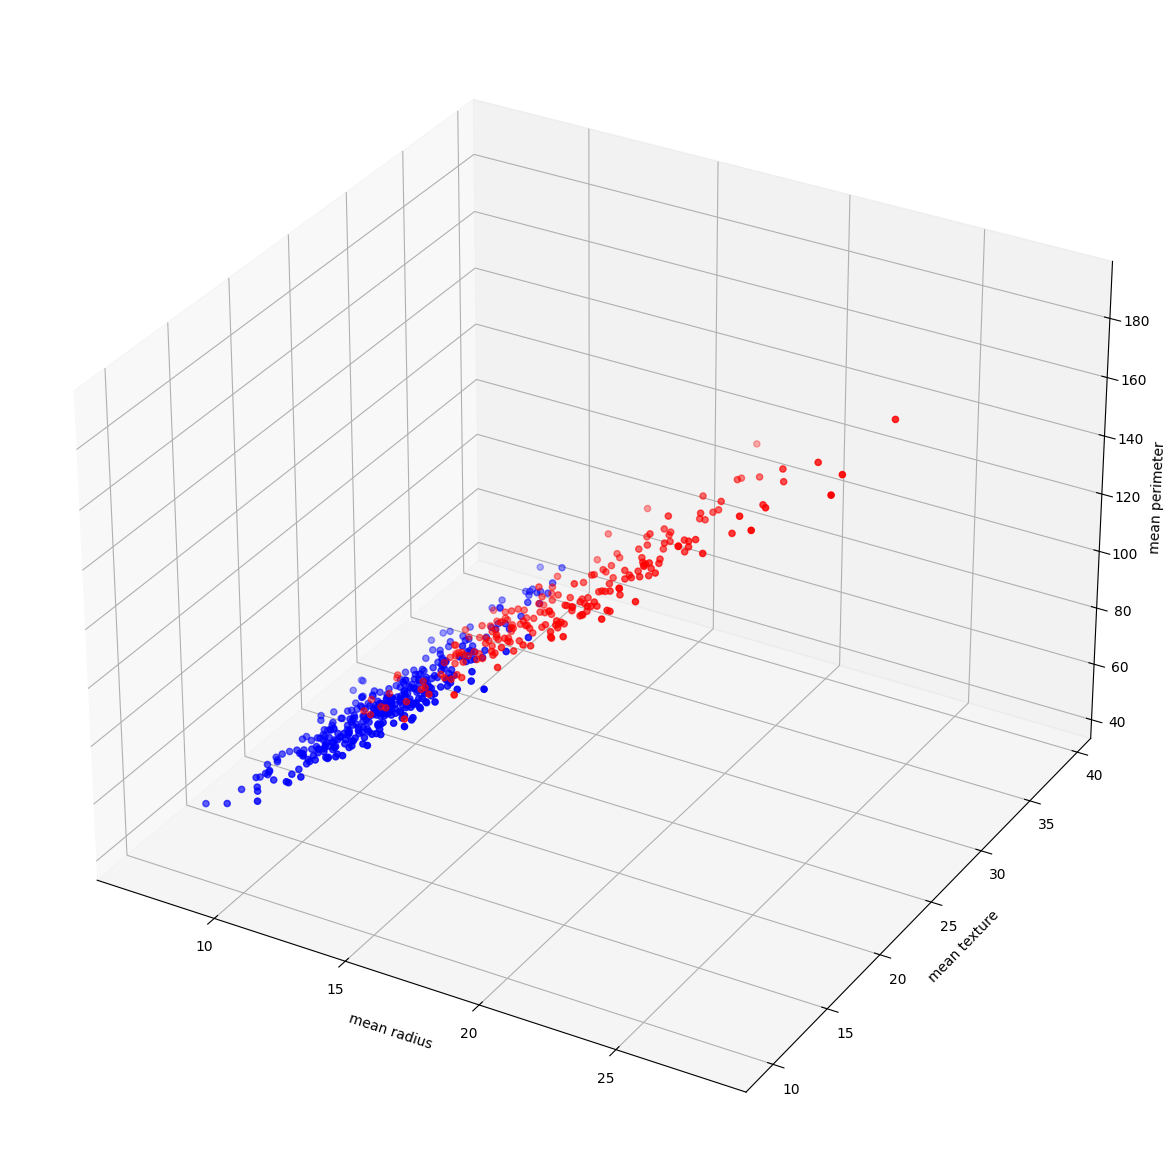

In [31]:
%matplotlib inline

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

#---copy from dataset into a 2-d array---
X = []
for target in range(2):
    X.append([[], [], []])
    for i in range(len(cancer.data)):    # target is 0,1
        if cancer.target[i] == target:
            X[target][0].append(cancer.data[i][0])
            X[target][1].append(cancer.data[i][1])
            X[target][2].append(cancer.data[i][2])

colours = ("r", "b")   # r: malignant, b: benign
fig = plt.figure(figsize=(18,15))
ax = fig.add_subplot(111, projection='3d')
for target in range(2):
    ax.scatter(X[target][0],
               X[target][1],
               X[target][2],
               c=colours[target])

ax.set_xlabel("mean radius")
ax.set_ylabel("mean texture")
ax.set_zlabel("mean perimeter")
plt.show()

<ipython-input-6-d8686ffac91f>:13: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(x,y,


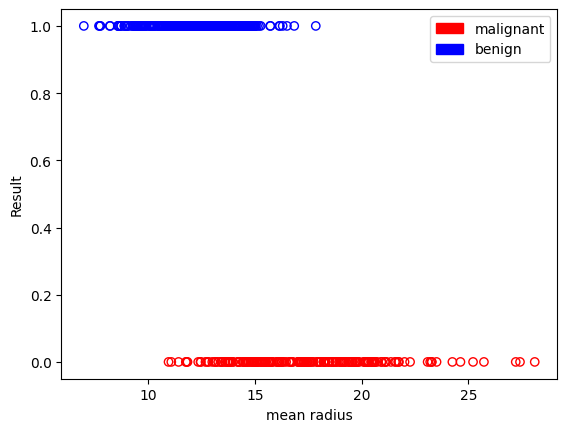

In [ ]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()   # Load dataset
x = cancer.data[:,0]            # mean radius
y = cancer.target               # 0: malignant, 1: benign
colors = {0:'red', 1:'blue'}    # 0: malignant, 1: benign

plt.scatter(x,y,
            facecolors='none',
            edgecolors=pd.DataFrame(cancer.target)[0].apply(lambda x: colors[x]),
            cmap=colors)

plt.xlabel("mean radius")
plt.ylabel("Result")

red   = mpatches.Patch(color='red',   label='malignant')
blue  = mpatches.Patch(color='blue',  label='benign')

plt.legend(handles=[red, blue], loc=1)

`%matplotlib inline` outputs the plot directly below the code cell and stores the plot in the notebook itself.

`x = cancer.data[:,0]` and `y = cancer.target` take the mean radius values (first column of the dataset) as `x` and the diagnosis result (malignant or benign) as `y`.- The `colors` dictionary maps the diagnosis result to a color: malignant to red and benign to blue.- `plt.scatter(x,y,...)` creates a scatter plot with x as `x` and y as `y`. The lambda function is used to map colors to corresponding points in the plot.

- `plt.xlabel('mean radius')` and `plt.ylabel('Result')` label the x-axis and y-axis respectively.

- `red = mpatches.Patch(color='red', label='malignant')` and `blue = mpatches.Patch(color='blue', label='benign')` create legend patches with appropriate colors and labels.

- `plt.legend(handles=[red, blue], loc=1)` adds the legend to the graph at an appropriate location. In this case, '1' represents the upper-right corner.



In [ ]:
from sklearn import linear_model
import numpy as np

log_regress = linear_model.LogisticRegression()

#---train the model---
log_regress.fit(X = np.array(x).reshape(len(x),1),
                y = y)

#---print trained model intercept---
print(log_regress.intercept_)

#---print trained model coefficients---
print(log_regress.coef_)

[15.120902]
[[-1.02475609]]


1. `from sklearn import linear_model`: This line imports the linear_model module, which contains methods for regression analysis, from the scikit-learn library.


2. `import numpy as np`: This line imports the numpy library, which provides support for arrays, matrices, and numerous mathematical functions to operate on these data structures.


3. `log_regress = linear_model.LogisticRegression()`: Here, an instance of the LogisticRegression class is being created, this will allow for the logistic regression model to be used.

4. `log_regress.fit(X = np.array(x).reshape(len(x),1), y = y)`: The fit function is being called on the logistic regression model to train the model. The arguments `X= np.array(x).reshape(len(x),1), y = y` represent the input features and output/target, respectively. The input features are being reshaped as the fit function takes a 2-dimensional array, so we reshape it to have one column and as many rows as necessary.


5. `print(log_regress.intercept_)`: This line prints the value of the intercept of the logistic regression model. The intercept is the point where the function intercepts the y-axis.


6. `print(log_regress.coef_)`: This line is printing the coefficient of the logistic regression model. Coefficients represent the relationship between the feature(s) and the target variable. Specifically, in logistic regression, the coefficient represents the change in log odds for each unit increase in your feature variable. For example, here, for each unit increase in our feature variable 'x', the log odds decrease by 0.54291739.In terminologies of the logistic regression equation (`ln(p/1-p) = a + bx` where p is the probability of the positive class), intercept is 'a' and coefficient is 'b'.

<ipython-input-8-22864278e1ea>:9: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(x,y,


Text(0, 0.5, 'Probability')

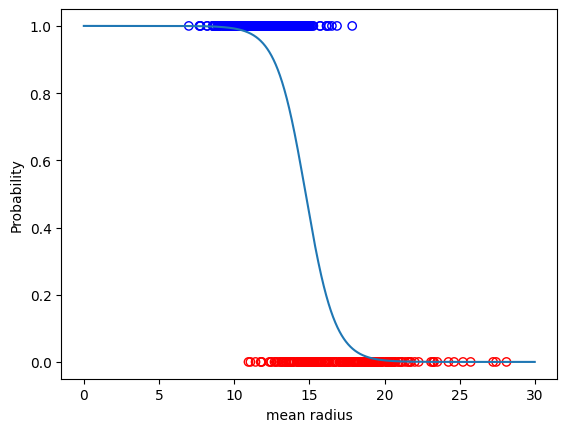

In [ ]:
def sigmoid(x):
      return (1 / (1 +
          np.exp(-(log_regress.intercept_[0] +
          (log_regress.coef_[0][0] * x)))))

x1 = np.arange(0, 30, 0.01)
y1 = [sigmoid(n) for n in x1]

plt.scatter(x,y,
    facecolors='none',
    edgecolors=pd.DataFrame(cancer.target)[0].apply(lambda x: colors[x]),
    cmap=colors)

plt.plot(x1,y1)
plt.xlabel("mean radius")
plt.ylabel("Probability")

def sigmoid(x): return (1 / (1 + np.exp(-(log_regress.intercept_[0] + (log_regress.coef_[0][0] * x)))))```a sigmoid function is defined. The sigmoid function maps any real number into the range (0, 1), making it useful in models like logistic regression where outputs can be interpreted as probabilities.

`log_regress.intercept_[0]` and `log_regress.coef_[0][0]` are the learned parameters from a logistic regression model, with `log_regress.intercept_[0]` being the bias term and `log_regress.coef_[0][0]` being the weight of the single feature, "mean radius"

.```pythonx1 = np.arange(0, 30, 0.01)y1 = [sigmoid(n) for n in x1]````x1` is a numpy array of evenly spaced values between 0 and 30, increments of 0.01. `y1` is the corresponding array of probabilities computed by passing each value of `x1` to the sigmoid function

.```pythonplt.scatter(x,y, facecolors='none', edgecolors=pd.DataFrame(cancer.target)[0].apply(lambda x: colors[x]), cmap=colors)```This code creates a scatter plot of data points.

The color of each point's edge is determined by the corresponding value in `cancer.target`.

Colors are assigned by the dictionary `colors`, which maps target labels to colors.```pythonplt.plot(x1,y1)plt.xlabel("mean radius")plt.ylabel("Probability")```This plots the logistic regression function (as a line plot) over the previous scatter plot.

In [ ]:
from sklearn.model_selection import train_test_split
train_set, test_set, train_labels, test_labels = train_test_split(
                              cancer.data,               # features
                              cancer.target,             # labels
                              test_size = 0.25,          # split ratio
                              random_state = 1,          # set random seed
                              stratify = cancer.target)  # randomize based on labels

train_test_split performs the split using a plethora of parameters.`cancer.data` and `cancer.target` are both being passed as parameters.

`cancer.data` is assumed to be a 2D array-like structure containing the features (independent variables) of the dataset.

On the other hand, `cancer.target` is expected to be a 1D array-like structure containing the labels or outcomes (dependent variables) for each feature set in `cancer.data`.

`test_size = 0.25` means that 25% of the data will be used for the test set, and the remainder (75%) will be used for the training set.

`random_state = 1` is used for initializing the internal random number generator, which will decide the splitting of data into train and test indices.

The way it works is that if we don't provide the `random_state` parameter, every time we run the train_test_split method we will get different train and test sets, but if we provide a fixed integer value to `random_state`, it will produce the same train and test sets no matter how many times we run it. This could be extremely useful if we want reproducible results.

Finally, `stratify = cancer.target` ensures that the distribution of labels will be the same in both the training and testing sets as in the original dataset. This can be critical in cases where the target variable distribution is uneven, as a simple random split may result in different distributions of the classes in the training and test datasets, potentially introducing bias.

In [ ]:
from sklearn import linear_model
x = train_set[:,0:30]         # mean radius
y = train_labels              # 0: malignant, 1: benign
log_regress = linear_model.LogisticRegression()
log_regress.fit(X = x,
                y = y)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

`x = train_set[:,0:30]`: This line is selecting the features from the training data. The notation `[:,0:30]` denotes that we are using all rows (":"), and columns from 0 to 30.

The result is a 2D array which is stored in the variable `x`.

3. `y = train_labels`: Here `y` is set as the output or labels of the training data. In the context of machine learning, `y` is often used to represent the "target" or the result we want our model to predict.

4. `log_regress = linear_model.LogisticRegression()`: This line creates an instance of the `LogisticRegression` class, which is a linear model for classification that predicts the probability of categorical class labels. The instance is stored in the variable `log_regress`.

5. `log_regress.fit(X = x, y = y)`: This line trains (or "fits") the model on our training data. It finds the best parameters that can map the input data `x` to the output data `y` using the logistic regression algorithm.

In [ ]:
import pandas as pd

#---get the predicted probablities and convert into a dataframe---
preds_prob = pd.DataFrame(log_regress.predict_proba(X=test_set))

#---assign column names to prediction---
preds_prob.columns = ["Malignant", "Benign"]

#---get the predicted class labels---
preds = log_regress.predict(X=test_set)
preds_class = pd.DataFrame(preds)
preds_class.columns = ["Prediction"]

#---actual diagnosis---
original_result = pd.DataFrame(test_labels)
original_result.columns = ["Original Result"]

#---merge the three dataframes into one---
result = pd.concat([preds_prob, preds_class, original_result], axis=1)
print(result.head())

   Malignant        Benign  Prediction  Original Result
0   0.999837  1.630691e-04           0                0
1   0.999748  2.518486e-04           0                0
2   0.173488  8.265124e-01           1                1
3   1.000000  5.658321e-09           0                0
4   0.089217  9.107834e-01           1                0


1. `preds_prob = pd.DataFrame(log_regress.predict_proba(X=test_set))`: Here, the `predict_proba` function generates the probabilities of the output being each class. In this case, the probabilities of the class being 'Malignant' and 'Benign'. This is done on the `test_set` data. This output is then converted into a pandas DataFrame.

2. `preds_prob.columns = ["Malignant", "Benign"]`: This line renames the columns of the probability predictions DataFrame from the default 0 and 1 to "Malignant" and "Benign".

3. `preds = log_regress.predict(X=test_set)`: Logistic Regression's `predict` function assigns a class label to each input sample, based on whether the predicted probability is above or below a certain threshold (by default, 0.5). So here, the class-label prediction for each input sample in the `test_set` is calculated and saved to `preds`.

4. `preds_class = pd.DataFrame(preds)` and `preds_class.columns = ["Prediction"]`: The predictions are converted into a DataFrame and the column name is changed to "Prediction".

5. `original_result = pd.DataFrame(test_labels)`,`original_result.columns = ["Original Result"]`: These lines convert actual labels into a DataFrame and renames the column to "Original Result".

6. `result = pd.concat([preds_prob, preds_class, original_result], axis=1)`: This merges the predicted probabilities DataFrame, the predicted class labels DataFrame, and the actual labels DataFrame into a single DataFrame along the column axis (`axis=1`).

7. `print(result.head())`: Finally, the first five rows of the combined DataFrame are printed out.

In [ ]:
#---generate table of predictions vs actual---
print("---Confusion Matrix---")
print(pd.crosstab(preds, test_labels))

---Confusion Matrix---
col_0   0   1
row_0        
0      48   4
1       5  86


In [ ]:
from sklearn import metrics
print(metrics.confusion_matrix(y_true=test_labels, y_pred=preds))

[[48  5]
 [ 4 86]]


In [ ]:
print("---Accuracy-------------")
print(log_regress.score(X= test_set, y= test_labels))

---Accuracy-------------
0.9370629370629371


In [ ]:
print(metrics.classification_report(
      y_true = test_labels,
      y_pred = preds))

              precision    recall  f1-score   support

           0       0.92      0.91      0.91        53
           1       0.95      0.96      0.95        90

    accuracy                           0.94       143
   macro avg       0.93      0.93      0.93       143
weighted avg       0.94      0.94      0.94       143

